# Using the TFA toolbox

   Imports:

In [1]:
import datetime as dt
import swarmpal.toolboxes.tfa.tfa_processor as tfa

Provide values for the parameters of the analysis.  The `dataset` can be chosen from one of the compatible magnetic data collections, and the `var` is a VirES-compatible variable string (see [viresclient](https://viresclient.readthedocs.io/en/latest/available_parameters.html) for more information). The "start" and "end" times must be given as a datetime object. If the data are required as they are, set the `remove_chaos_model` parameter to False. Otherwise, if the inputs are magnetic field data and the analysis requires subtraction of the model field, set the parameter to True. 

Ground Station data can be requested by using the Collection name `SW_OPER_AUX_OBSM2_:` followed by the three letter IAGA code of the station of interenst. In example, to get data from the Hornsund station in Svalbard, use "HRN". Available fields are `F` and `B_NEC`, as for the Swarm case.

WARNING: Ground Station data are given in 1-minute time resolution, so can only be used for the very low frequency bands (i.e. Pc5).

In [2]:
dataset = "SW_OPER_AUX_OBSM2_:HRN"
series_dt = "PT1M"
var = 'B_NEC'
remove_chaos_model = True
time_start = dt.datetime(2015, 3, 14, 0, 0, 0)
time_end = dt.datetime(2015, 3, 14, 23, 59, 59)

Now run the TfaInput to retrieve the selected data.

In [3]:
inputs = tfa.TfaInput(collection = dataset, 
                start_time = time_start, end_time = time_end,
                initialise = True,
                varname=var, sampling_time = series_dt,
                remove_chaos=remove_chaos_model)


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.13MB)

Note: This is a dataset that is not yet supported officialy by SwarmPAL. The TFA bypasses that, by calling the ViresClient directly, behind the scenes, in order to get the data and then formats them so that they become of similar type with the other commonly used products. This will be updated soon, to be correctly supported through the normal channels.

Now that the data have been retrieved, we can proceed to for Wavelet processing by initiating the `TfaProcessor` object and specifying the name of the variable and the component of choice (0 for North, 1 for East and 2 for Center).

In [4]:
processor = tfa.TfaProcessor(inputs, active_variable={"varname": "B_NEC", "component": 0})

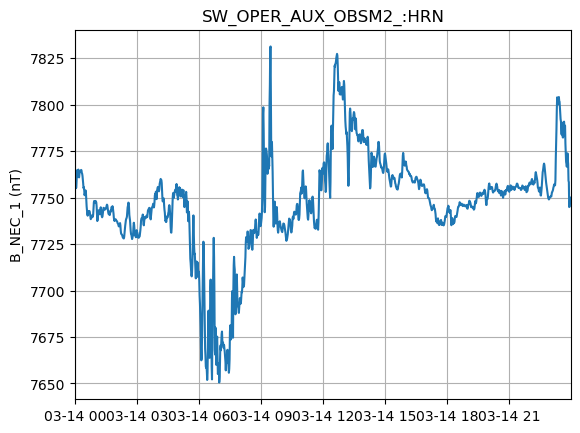

In [5]:
processor.plotX()

To perform cleaning on the data, we initialize a `Cleaning` object with the parameters of our choice and then apply it on the data with the `TfaProcessor` `apply()` function.
The active variable series can be plotted by means of the `plotX()` function.

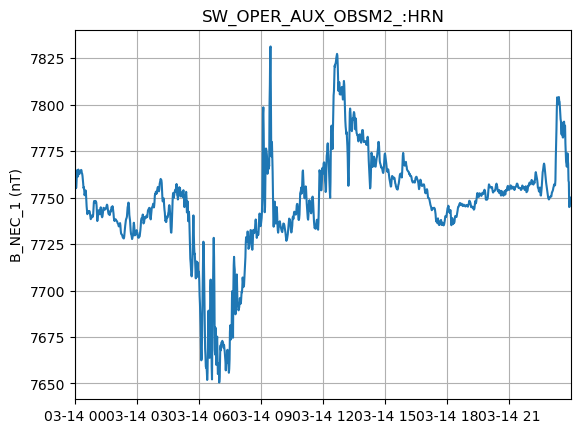

In [6]:
c = tfa.Cleaning({"Window_Size": 10, "Method": "iqr", "Multiplier": 1})
processor.apply(c)
processor.plotX()

Similarly, the filtering can be performed by first initializing a `Filtering` object with the parameters of our choosing and the applying in on the data.

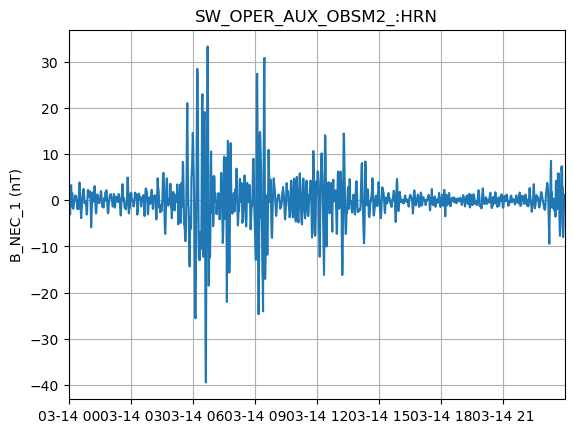

In [7]:
f = tfa.Filtering({"Sampling_Rate": 1/processor.input_data.SAMPLING_TIME, "Cutoff": 1/1000})
processor.apply(f)
processor.plotX()

In the same way, the wavelet transform is applied. The result of the wavelet can be visualized by means of the image() function.

Note that since the ground station data are provided in a 1-minute sampling time, the frequency range to be studied must be very low, i.e. Pc5 (2 - 7 mHz). Frequencies higher than 8 mHz cannot really be captured with these data, since the Nyquist frequency for a sampling time dt of 60 seconds is 1/(2*60) = 8.33 mHz!

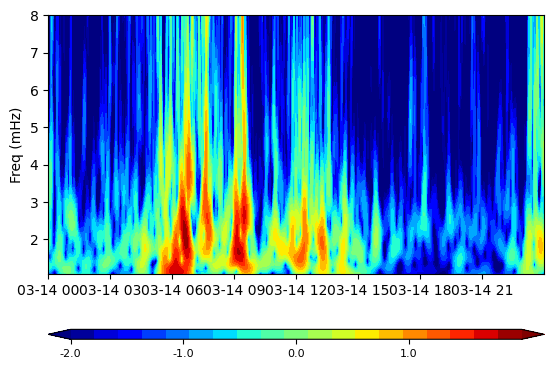

In [8]:
w = tfa.Wavelet({'Time_Step': processor.input_data.SAMPLING_TIME, 'Min_Scale': 1000/8, 'Max_Scale': 1000/1, 'dj': 0.1})
processor.apply(w)
processor.image(cbar_lims=[-2, 2])

Produce an index of wave activity by simply running the `wave_index()` function. The results can be visualized by using the `plotI()` function, similar to the `plotX()` that is used to display the field time series data.

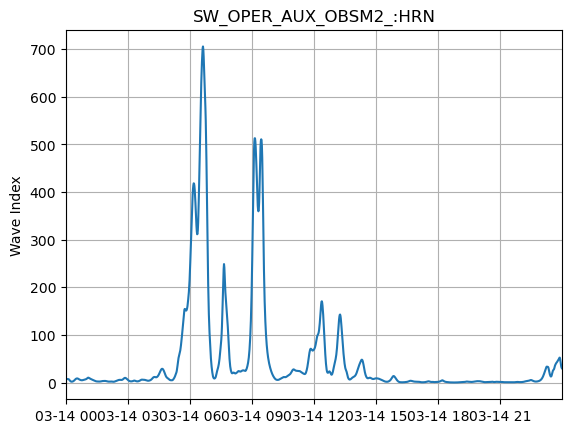

In [9]:
processor.wave_index()
processor.plotI()